In [2]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
f= open("C:/PYTHON/WC/관계분석돌릴거임.txt",'r')
lines = f.readlines()
f.close()

In [4]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [5]:
dataset = []


In [6]:
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','',lines[i])))

In [7]:
dataset[:10]

[['불법주차'],
 ['불법주차'],
 ['장애인주차구역'],
 ['버스정류소', '불법', '주정차', '신고'],
 ['장애', '전용구역', '불법주차'],
 ['불법주차'],
 ['장애인구역주차'],
 ['불법주차'],
 ['횡단보도', '불법', '주정차', '신고'],
 ['장애인주차구역', '주차못하', '막아놈']]

In [8]:
from apyori import apriori

In [105]:
result=(list(apriori(dataset, min_support=0.01)))

In [106]:
df=pd.DataFrame(result)

In [107]:
df['length']=df['items'].apply(lambda x: len(x))

In [108]:
df=df[(df['length']==2)&
     (df['support'] >=0.02)].sort_values(by='support',ascending=False)

In [109]:
df.head(10)

,items,support,ordered_statistics,length
62,"(주정차, 불법)",0.247401,"[((), (불법, 주정차), 0.24740124740124741, 1.0), ((...",2
61,"(신고, 불법)",0.242204,"[((), (신고, 불법), 0.24220374220374222, 1.0), ((불...",2
71,"(신고, 주정차)",0.242204,"[((), (신고, 주정차), 0.24220374220374222, 1.0), ((...",2
64,"(장애, 불법주차)",0.200624,"[((), (장애, 불법주차), 0.20062370062370063, 1.0), (...",2
74,"(장애, 전용구역)",0.148649,"[((), (장애, 전용구역), 0.14864864864864866, 1.0), (...",2
65,"(전용구역, 불법주차)",0.148649,"[((), (전용구역, 불법주차), 0.14864864864864866, 1.0),...",2
63,"(횡단보도, 불법)",0.139293,"[((), (횡단보도, 불법), 0.1392931392931393, 1.0), ((...",2
76,"(횡단보도, 주정차)",0.138254,"[((), (횡단보도, 주정차), 0.13825363825363826, 1.0), ...",2
72,"(신고, 횡단보도)",0.136175,"[((), (신고, 횡단보도), 0.13617463617463618, 1.0), (...",2
75,"(장애, 전용주차구역)",0.046778,"[((), (장애, 전용주차구역), 0.04677754677754678, 1.0),...",2


In [110]:
G=nx.Graph()

In [111]:
ar=(df['items']); G.add_edges_from(ar)

In [112]:
pr=nx.pagerank(G)


In [113]:
nsize=np.array([v for v in pr.values()])


In [114]:
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

In [115]:
pos=nx.random_layout(G)

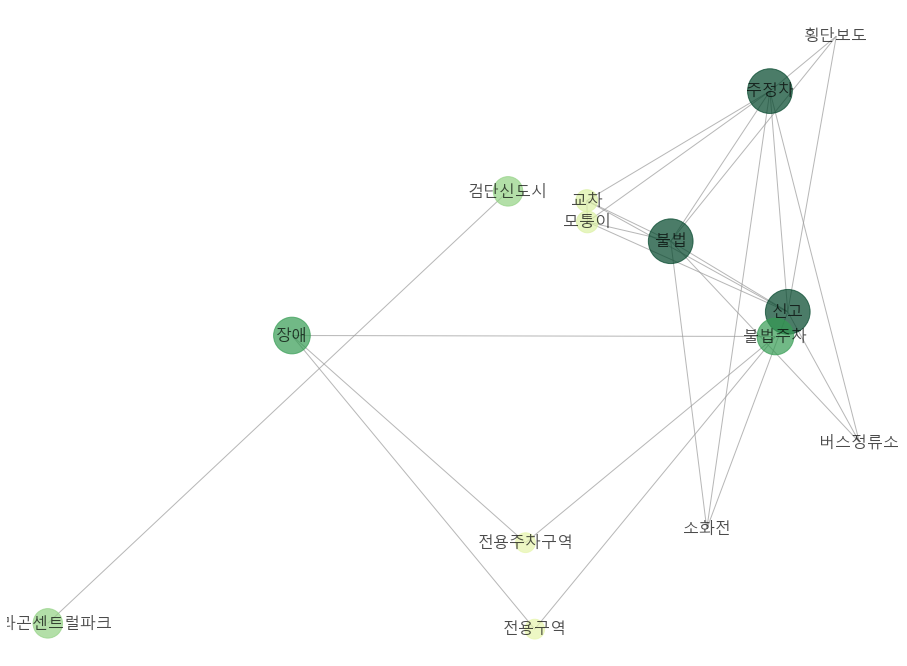

In [120]:
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='Malgun Gothic',font_size=16,                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7, edge_color='.6', cmap=plt.cm.YlGn)
# plt.savefig('C:/PYTHON/WC/관계분석.png', bbox_inches='tight')
plt.savefig('C:/PYTHON/WC/관계분석.png', bbox_inches='tight')